In [1]:
import pandas as pd
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
#https://www.kaggle.com/c/made-hw-2/
#https://newtechaudit.ru/reshaem-nlp-zadachu-klassifikacziya-tekstov-po-temam/

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\do6pb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [13]:
english_stopwords = stopwords.words('english')
english_stopwords = []

delete = ["[u'", "']", "u'", 'u']

# Удаление знаков пунктуации из текста
def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)
def remove_punct2(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

"""df['dialogue'] = df['dialogue'].map(lambda x: x.replace("\x92", " "))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace(" \x97", ""))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace("\x97", ""))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace(" \x96", ""))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace("\x96", ""))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace("\x93", ""))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace("\x94", ""))
df['dialogue'] = df['dialogue'].map(lambda x: x.replace("\x85", " "))
df['dialogue'] = df['dialogue'].map(lambda x: x.lower())
df['dialogue'] = df['dialogue'].map(lambda x: remove_punct(x))
df['dialogue'] = df['dialogue'].map(lambda x: x.split(' '))
df['dialogue'] = df['dialogue'].map(lambda x: [token for token in x if token not in english_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
df['dialogue'] = df['dialogue'].map(lambda x: ' '.join(x))
"""


df['genres'] = df['genres'].map(lambda x: remove_punct2(x))
df['genres'] = df['genres'].map(lambda x: x.split(' '))
df['genres'] = df['genres'].map(lambda x: [token for token in x if token not in delete\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
for i in range(len( df['genres'] )):
    if len(df['genres'][i]) > 3:
        df.drop([i], inplace=True)
        
df['genres'] = df['genres'].map(lambda x: ' '.join(x))
"""
test['dialogue'] = test['dialogue'].map(lambda x: x.replace("\x92", " "))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace(" \x97", ""))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace("\x97", ""))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace(" \x96", ""))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace("\x96", ""))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace("\x93", ""))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace("\x94", ""))
test['dialogue'] = test['dialogue'].map(lambda x: x.replace("\x85", " "))
test['dialogue'] = test['dialogue'].map(lambda x: x.lower())
test['dialogue'] = test['dialogue'].map(lambda x: remove_punct(x))
test['dialogue'] = test['dialogue'].map(lambda x: x.split(' '))
test['dialogue'] = test['dialogue'].map(lambda x: [token for token in x if token not in english_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])
test['dialogue'] = test['dialogue'].map(lambda x: ' '.join(x))
"""

'\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace("\x92", " "))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace(" \x97", ""))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace("\x97", ""))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace(" \x96", ""))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace("\x96", ""))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace("\x93", ""))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace("\x94", ""))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.replace("\x85", " "))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.lower())\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: remove_punct(x))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: x.split(\' \'))\ntest[\'dialogue\'] = test[\'dialogue\'].map(lambda x: [token for token in x if token not in english_stopwords                                                   

In [73]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

y_train = MultiLabelBinarizer().fit_transform(df['genres'].values)
mlb = MultiLabelBinarizer()
mlb.fit(df['genres'].values)


text_transformer = TfidfVectorizer()
X_train = text_transformer.fit_transform(df['dialogue'])
X_test = text_transformer.transform(test['dialogue'])

In [12]:

#X_train = CCA(n_components=len(mlb.classes_)).fit(X_train.toarray(), y_train).transform(X_train.toarray())

In [13]:
classif = OneVsRestClassifier(SVC())
classif.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [14]:
test_preds = classif.predict(X_test)

In [15]:
test['genres'] = mlb.inverse_transform( test_preds )
test['genres'] = test['genres'].map(lambda x: list(x))
test['genres'] = test['genres'].map(lambda x: ' '.join(x))
test = test.drop(['dialogue'], axis=1)
test.head()

id    genres
0   0     drama
1   1     drama
2   2     drama
3   3     drama
4   4  thriller

In [16]:
test.to_csv("solv17.csv", index=False)

Automatically created module for IPython interactive environment


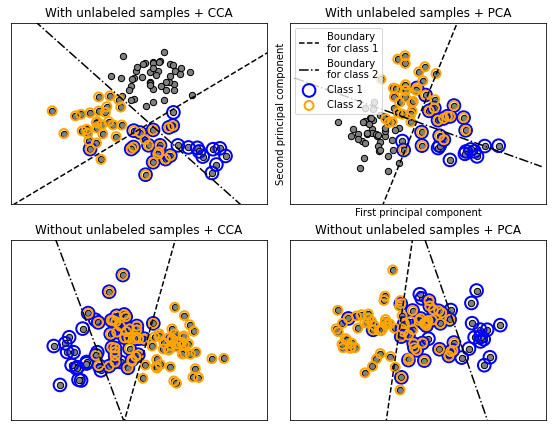

In [40]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
                facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
                facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=False,
                                      random_state=1)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()

C:\Users\do6pb\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<AxesSubplot:>

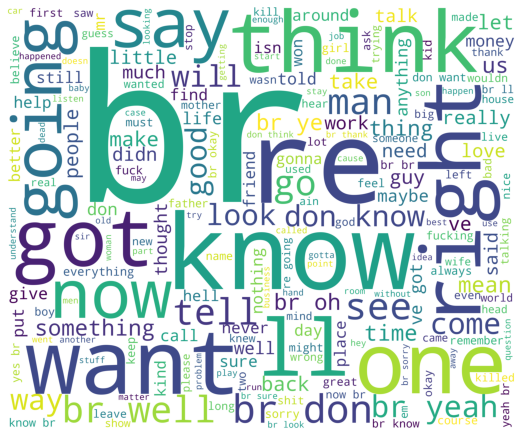

In [38]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              #stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(df['dialogue'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [14]:
from sklearn.pipeline import Pipeline
# pipeline позволяет объединить в один блок трансформер и модель, что упрощает написание кода и улучшает его читаемость
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer преобразует тексты в числовые вектора, отражающие важность использования каждого слова из некоторого набора слов (количество слов набора определяет размерность вектора) в каждом тексте
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
# линейный классификатор и классификатор методом ближайших соседей
from sklearn import metrics
# набор метрик для оценки качества модели
from sklearn.model_selection import GridSearchCV
# модуль поиска по сетке параметров
from sklearn.linear_model import LogisticRegression

In [5]:
"""from sklearn.model_selection import train_test_split
X_train = text_transformer.fit_transform(df['dialogue'])
y_train = df['genres'].values

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)"""

"from sklearn.model_selection import train_test_split\nX_train = text_transformer.fit_transform(df['dialogue'])\ny_train = df['genres'].values\n\nX_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)"

In [6]:
"""logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)
logit.fit(X_train, y_train)
test_preds = logit.predict(X_test)"""

"logit = LogisticRegression(C=5e1, solver='lbfgs', multi_class='multinomial', random_state=17, n_jobs=4)\nlogit.fit(X_train, y_train)\ntest_preds = logit.predict(X_test)"

In [128]:
"""from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

cv_results = cross_val_score(logit, X_train, y_train, cv=skf, scoring='f1_micro')
cv_results, cv_results.mean()"""

In [15]:
text_transformer = TfidfVectorizer() #stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000

In [16]:
X_train = text_transformer.fit_transform(df['dialogue'])
y_train = df['genres'].values

X_test = text_transformer.transform(test['dialogue'])

In [17]:
logit = LogisticRegression(C=50, multi_class='multinomial', solver='lbfgs', random_state=17, n_jobs=4)#  solver='sag'   'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

In [18]:
logit.fit(X_train, y_train)

LogisticRegression(C=50, multi_class='multinomial', n_jobs=4, random_state=17)

In [19]:
test_preds = logit.predict(X_test)

In [20]:
test['genres'] = test_preds
test = test.drop(['dialogue'], axis=1)
test.head()

id           genres
0   0      crime drama
1   1   drama thriller
2   2            drama
3   3            drama
4   4  action thriller

In [21]:
test.to_csv("solv23.csv", index=False)

In [22]:
import eli5

eli5.show_weights(estimator=logit, 
                  feature_names= list(text_transformer.get_feature_names()),
                 top=(50, 5))